Importing libraries

In [1]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
's' in 'sef'

True

Importing classes

In [2]:
#CMAB
from Strategies.RCLinUCB                   import RCLinUCB
from Strategies.RCLinUCBProduct                   import RCLinUCBProduct
from Strategies.RLinUCBGlobal                   import RLinUCBGlobal
#Rewards
from simulacion.Strategies.Rewards.OffFeature import OffFeature

Init Parameters

In [3]:
#834596
iterations = 10000
experimentos = 200

d = 10
alpha = 1
clusters_amounts = [1]
lamb = 1

sup_percentile = 75
inf_percentile = 25

Init

In [4]:
import pickle

with open('../datos/users.pkl', 'rb') as fp:
    users = list(pickle.load(fp))

with open('../datos/articles.pkl', 'rb') as fp:
    articles = list(pickle.load(fp).values())
    print(articles)

[{'clicks': 1389, 'views': 20650, 'features': array([[2.11406e-01],
       [3.60000e-05],
       [2.77300e-03],
       [5.69886e-01],
       [2.15900e-01]]), 'id': 109513, 'probability': 0.06726392251815981}, {'clicks': 1073, 'views': 24024, 'features': array([[2.95442e-01],
       [1.40000e-05],
       [1.35191e-01],
       [2.92304e-01],
       [2.77050e-01]]), 'id': 109473, 'probability': 0.044663669663669664}, {'clicks': 740, 'views': 16581, 'features': array([[2.64355e-01],
       [1.20000e-05],
       [3.73930e-02],
       [4.20649e-01],
       [2.77591e-01]]), 'id': 109506, 'probability': 0.04462939509076654}, {'clicks': 1825, 'views': 31747, 'features': array([[3.81149e-01],
       [1.29000e-04],
       [6.00380e-02],
       [2.69129e-01],
       [2.89554e-01]]), 'id': 109511, 'probability': 0.05748574668472611}, {'clicks': 18, 'views': 305, 'features': array([[3.75829e-01],
       [2.50000e-05],
       [3.30410e-02],
       [3.49637e-01],
       [2.41468e-01]]), 'id': 109505, 

In [5]:
user_amount = len(users)
print(user_amount)

k = len(articles)
print(k)

reward_class1 = OffFeature(articles, users)
reward_class2 = OffFeature(articles, users)

3135
49


In [6]:
# Run experiments
resultados_g              = np.zeros((experimentos,iterations))
resultados_p              = np.zeros((experimentos,iterations))
valores = np.zeros((experimentos, 2))
# Run experiments
for i in    range(experimentos):
    print(str(i)+"/"+str(experimentos))
    alpha = random.random() * 0.1 + 0.35 #alpha
    lamb = random.random() * 0.1 + 0.35 #lamb

    reward_class1.reset()
    reward_class2.reset()

    linucbg       = RLinUCBGlobal(k, iterations, reward_class1, d, user_amount, alpha, lamb )
    linucbpk       = RCLinUCBProduct(k, iterations, reward_class2, d, user_amount, alpha, clusters_amounts, lamb, 1000, 500 )

    resultados_g[i]          = linucbg.run()
    resultados_p[i]          = linucbpk.run()



0/200
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
1/200
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
2/200
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
3/200
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
4/200
0/10000
1000/10000
2000/10000
3000/10000
4000/10000
5000/10000
6000/10000
7000/10000
8000/10000
9000/10000
0/10000

In [7]:
linucb_inf            = np.percentile(resultados_g,inf_percentile ,axis=0)
linucb_median_rew     = np.median(resultados_g,axis=0)
linucb_sup            = np.percentile(resultados_g,sup_percentile ,axis=0)

linucb_p_inf            = np.percentile(resultados_p,inf_percentile ,axis=0)
linucb_p_median_rew     = np.median(resultados_p,axis=0)
linucb_p_sup            = np.percentile(resultados_p,sup_percentile ,axis=0)

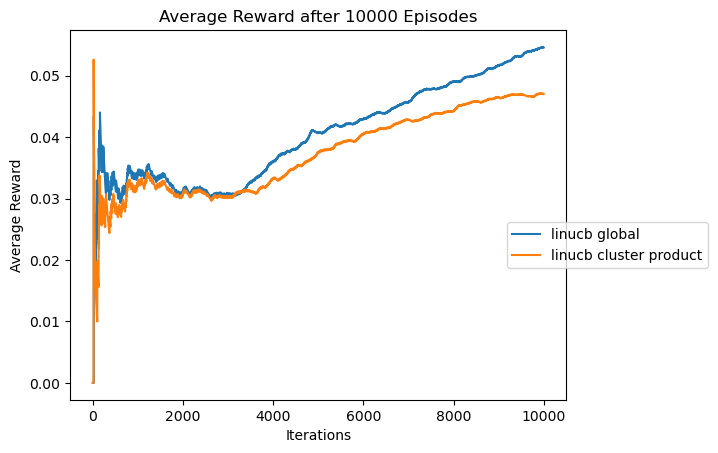

In [8]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(linucb_median_rew,label="linucb global")
plt.plot(linucb_p_median_rew,label="linucb cluster product")

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Reward after " + str(iterations)
    + " Episodes")
#plt.ylim(0,0.1)
plt.show()


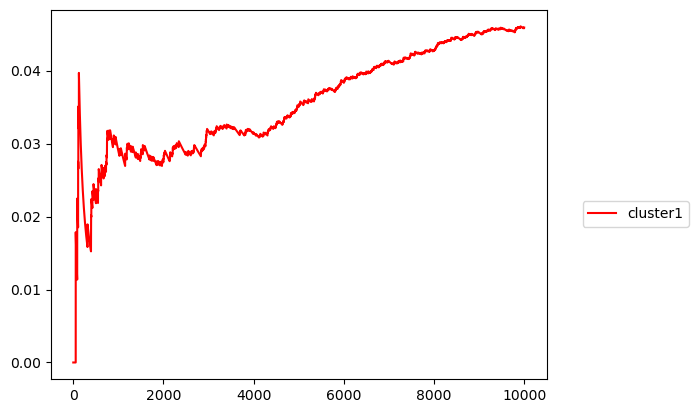

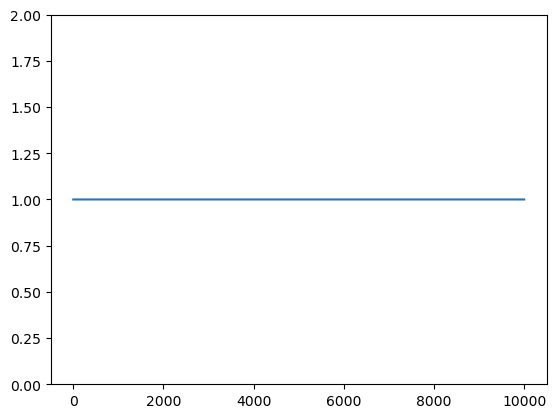

In [9]:
linucbpk.get_rc().graph()

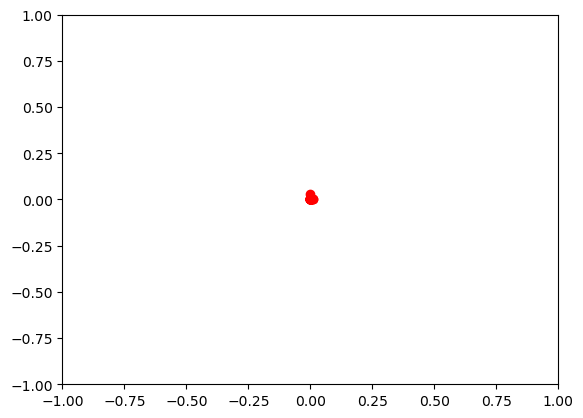

In [10]:
linucbpk.get_model().graph()